In [1]:
print("test")

# Sup guys. This is TouhouMusicClassifier V2.0
# This one is fully functional and works with multiple classes!
# The cool part is the "optimal" cutting of the audio data. Not sure if it is good but :idk:
###
# Ideas that I have for future versions
# 1. Add a classification for "None". 
#     Ie, given 3 genres, there will be a 4th classification that corresponds to none of the genres
#
# 2. Eventually TouhouMusicClassifier as a discriminator for GAN model to help in autogenerating music.

SyntaxError: invalid syntax (Temp/ipykernel_12408/2996607428.py, line 4)

In [2]:
import os
import librosa
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
def pretty(d, indent=0):
   for key, value in d.items():
    
      if indent >= 4:
        continue
    
      print('\t' * indent + str(key))
      if key == "cut_data":
        print('\t' * (indent+1) + "...")
        continue
      if isinstance(value, dict):
         pretty(value, indent+1)
      else:
         print('\t' * (indent+1) + str(value))

In [4]:
global_data = {
    "metadata0":{
        "num_songs": 0,
        "num_genres": 0,
        "cut_len": 100000,
        "use_optimal_cut": False,
        "use_test_genre": False,
    },
    "data0":{}
}

In [5]:
pretty(global_data)

metadata0
	num_songs
		0
	num_genres
		0
	cut_len
		100000
	use_optimal_cut
		False
	use_test_genre
		False
data0


In [6]:
def getNumGenres():
    return global_data["metadata0"]["num_genres"]

def getCutLen():
    return global_data["metadata0"]["cut_len"]

def getTrackData(genre,songname):
    return global_data["data0"][genre]["data1"][songname]

def usingOptimalCut():
    return global_data["metadata0"]["use_optimal_cut"]

def usingTestGenre():
    return global_data["metadata0"]["use_test_genre"]

def checkGenreNameExists(genre: str):
    if genre in global_data["data0"]:
        return True
    return False

def setUseTestGenreFlagTrue():
    global_data["metadata0"]["use_test_genre"] = True

def initGenre(genre):
    global_data["data0"].update(
        {
            genre:{
                "metadata1":{
                    "genre_int_assignment":getNumGenres(),
                    "num_songs_for_this_genre": 0
                },
                "data1":{}
            }
        })
    if genre.lower() != "test":
        global_data["metadata0"]["num_genres"] += 1

def initSong(genre, file_name, y, sr):
    global_data["data0"][genre]["data1"].update(
        {
            file_name : {
                "y":y,
                "sr":sr,
                "cut_data":{},
            }
        }
    )
    
    global_data["metadata0"]["num_songs"] += 1
    global_data["data0"][genre]["metadata1"]["num_songs_for_this_genre"] += 1

In [7]:
music_ext = ['mp3','m4a']
def initSongs(dir_path, genre_name):
    if genre_name.lower() == "test":
        setUseTestGenreFlagTrue()
    
    if not checkGenreNameExists(genre_name):
        initGenre(genre_name)
    
    for root, directories, file_ls in os.walk(dir_path):
        print(root)
        for file_name in file_ls:
            if file_name.split('.')[-1].lower() not in music_ext:
                continue
            
            file_path = root + "\\" + file_name
            print("Currently loading", file_path)
            try:
                y,sr = librosa.load(file_path, sr = None)
                y = librosa.util.normalize(y) #Not sure if its correct to normalize here
                initSong(genre_name,file_name,y,sr)
            except ValueError as err:  #raised if `y` is empty.
                print(f"-----{file_path} has error: {err}")
                pass
            
            
            
                
            

In [8]:
# initSongs("D:\Music\TESTING FOLDER\Touhou", "Touhou")
# initSongs("D:\Music\TESTING FOLDER\\Not_Touhou", "Not_Touhou")


initSongs("D:\Music\Touhou Bangers\Yuuhei Satellite", "Vocal")
initSongs("D:\Music\Touhou Bangers\TAMAONSEN", "Vocal")
initSongs("D:\Music\Touhou Bangers\ZYTOKINE", "Vocal")
initSongs("D:\Music\Touhou Bangers\Tutti Sound", "Orchestral")
initSongs("D:\Music\Touhou Bangers\Rolling Contact", "Non_vocal")
initSongs("D:\Music\Touhou Bangers\Kanpyo's MIDI", "Non_vocal")

D:\Music\Touhou Bangers\Yuuhei Satellite
D:\Music\Touhou Bangers\Yuuhei Satellite\MERMAiD
Currently loading D:\Music\Touhou Bangers\Yuuhei Satellite\MERMAiD\【東方ボーカル】 幽閉サテライト - MERMAiD.mp3
D:\Music\Touhou Bangers\Yuuhei Satellite\ささやく、消えかけた後遺症が。
Currently loading D:\Music\Touhou Bangers\Yuuhei Satellite\ささやく、消えかけた後遺症が。\【公式】【東方Vocal】ささやく、消えかけた後遺症が。 _ 幽閉サテライト【FullMV】(原曲：ラストリモート _ ハルトマンの妖怪少女).mp3
D:\Music\Touhou Bangers\Yuuhei Satellite\アノ華咲クヤ
Currently loading D:\Music\Touhou Bangers\Yuuhei Satellite\アノ華咲クヤ\【東方ボーカル】 「ヒトリシズカ」 【幽閉サテライト】 【Subbed】.mp3
D:\Music\Touhou Bangers\Yuuhei Satellite\カフカなる群青へ
Currently loading D:\Music\Touhou Bangers\Yuuhei Satellite\カフカなる群青へ\【東方ボーカル】 少女フラクタル - カフカなる群青へ.mp3
D:\Music\Touhou Bangers\Yuuhei Satellite\コノ葉隠レ～石～
Currently loading D:\Music\Touhou Bangers\Yuuhei Satellite\コノ葉隠レ～石～\【公式】【東方Vocal】幽閉サテライト _ コノ葉隠レ～石～【FullMV】(原曲：風神少女).mp3
Currently loading D:\Music\Touhou Bangers\Yuuhei Satellite\コノ葉隠レ～石～\【東方Vocal／Rock】悪の証明を「幽閉サテライト」.mp3
Currently loading D:\Music\

Currently loading D:\Music\Touhou Bangers\TAMAONSEN\LIVES\Hands (feat. AO, らっぷびと) _ 魂音泉 [Music Video].mp3
D:\Music\Touhou Bangers\TAMAONSEN\Re∶Raise QUINTUPLE
Currently loading D:\Music\Touhou Bangers\TAMAONSEN\Re∶Raise QUINTUPLE\【東方ボーカル】「Touch - Hide And Seek Remix」【魂音泉】.mp3
D:\Music\Touhou Bangers\TAMAONSEN\THE SELECTED WORKS OF TAMAONSEN 2
Currently loading D:\Music\Touhou Bangers\TAMAONSEN\THE SELECTED WORKS OF TAMAONSEN 2\【東方ボーカル】 slushy poetry feat. 妖狐 (Never Knows Forever Remix) 【TAMAONSEN】.mp3
D:\Music\Touhou Bangers\TAMAONSEN\THE SELECTED WORKS OF TAMAONSEN 4
Currently loading D:\Music\Touhou Bangers\TAMAONSEN\THE SELECTED WORKS OF TAMAONSEN 4\【東方ボーカル】 「幻想河童行進曲 feat. ｙｔｒ」 【魂音泉】.mp3
D:\Music\Touhou Bangers\TAMAONSEN\World's End Garden
Currently loading D:\Music\Touhou Bangers\TAMAONSEN\World's End Garden\【東方ニコカラ】 さくらさくら  feat. らっぷびと【魂音泉】.mp3
D:\Music\Touhou Bangers\TAMAONSEN\WORLD'S END PARADISE
Currently loading D:\Music\Touhou Bangers\TAMAONSEN\WORLD'S END PARADISE\DESIRE OVE

D:\Music\Touhou Bangers\Tutti Sound\東方映画音楽選 - TOHO FILM MUSIC SELECTION - ～ 紅幻奏詩
Currently loading D:\Music\Touhou Bangers\Tutti Sound\東方映画音楽選 - TOHO FILM MUSIC SELECTION - ～ 紅幻奏詩\Tutti Sound - FOREST LIBRARY.mp3
Currently loading D:\Music\Touhou Bangers\Tutti Sound\東方映画音楽選 - TOHO FILM MUSIC SELECTION - ～ 紅幻奏詩\Tutti Sound - ここが私の護る場所.mp3
Currently loading D:\Music\Touhou Bangers\Tutti Sound\東方映画音楽選 - TOHO FILM MUSIC SELECTION - ～ 紅幻奏詩\Tutti Sound - ナイフが語るは真なる正義.mp3
Currently loading D:\Music\Touhou Bangers\Tutti Sound\東方映画音楽選 - TOHO FILM MUSIC SELECTION - ～ 紅幻奏詩\Tutti Sound - ヴアル戦機.mp3
Currently loading D:\Music\Touhou Bangers\Tutti Sound\東方映画音楽選 - TOHO FILM MUSIC SELECTION - ～ 紅幻奏詩\Tutti Sound - 赤眼の深淵.mp3
Currently loading D:\Music\Touhou Bangers\Tutti Sound\東方映画音楽選 - TOHO FILM MUSIC SELECTION - ～ 紅幻奏詩\【東方】 黒林檎 ~ Arrange ~ 『34』.mp3
Currently loading D:\Music\Touhou Bangers\Tutti Sound\東方映画音楽選 - TOHO FILM MUSIC SELECTION - ～ 紅幻奏詩\【東方】 黒林檎 ~ Arrange ~ 『48』.mp3
D:\Music\Touhou Bangers\Tu

Currently loading D:\Music\Touhou Bangers\Rolling Contact\YABBA RAGGA TOHO\06 天音 (Rolling Contact) - Fox Hound (2018 Remaster).mp3
Currently loading D:\Music\Touhou Bangers\Rolling Contact\YABBA RAGGA TOHO\07 天音 (Rolling Contact) - Undefined Twins (Ragga Tune).mp3
Currently loading D:\Music\Touhou Bangers\Rolling Contact\YABBA RAGGA TOHO\08 天音 (Rolling Contact) - Jammin Tune (Reset Riddim).mp3
Currently loading D:\Music\Touhou Bangers\Rolling Contact\YABBA RAGGA TOHO\09 天音 (Rolling Contact) - XDXA (2018 Remaster).mp3
Currently loading D:\Music\Touhou Bangers\Rolling Contact\YABBA RAGGA TOHO\10 天音 (Rolling Contact) - Sakura Selecter.mp3
D:\Music\Touhou Bangers\Rolling Contact\Yabba Ragga Toho 2
Currently loading D:\Music\Touhou Bangers\Rolling Contact\Yabba Ragga Toho 2\Rolling Contact - Yabba Ragga Toho 2 [10].mp3
Currently loading D:\Music\Touhou Bangers\Rolling Contact\Yabba Ragga Toho 2\Rolling Contact - Yabba Ragga Toho 2 [1].mp3
Currently loading D:\Music\Touhou Bangers\Rolling Co

-----D:\Music\Touhou Bangers\Kanpyo's MIDI\No Album\kanpyo_2011_seirensen_skyruin.mp3 has error: zero-size array to reduction operation maximum which has no identity
Currently loading D:\Music\Touhou Bangers\Kanpyo's MIDI\No Album\kanpyo_2012_fairy_starsapphire.mp3
Currently loading D:\Music\Touhou Bangers\Kanpyo's MIDI\No Album\kanpyo_2012_kanpyo_eiyasyo_eiyano.mp3
Currently loading D:\Music\Touhou Bangers\Kanpyo's MIDI\No Album\kanpyo_2012_kanpyo_kouma_bbcc.mp3
Currently loading D:\Music\Touhou Bangers\Kanpyo's MIDI\No Album\kanpyo_2012_seirensen_haikara_noap.mp3
Currently loading D:\Music\Touhou Bangers\Kanpyo's MIDI\No Album\kanpyo_2012_seirensen_yuurei.mp3


In [9]:
# TEST HAS TO BE INIT LAST

initSongs("D:\Music\TESTING FOLDER\Joshua's Music","Test")
initSongs("D:\Music\Touhou Bangers\WAVE", "Test")

D:\Music\TESTING FOLDER\Joshua's Music
Currently loading D:\Music\TESTING FOLDER\Joshua's Music\3R2 - Pancake Is Love.m4a
Currently loading D:\Music\TESTING FOLDER\Joshua's Music\5 Seconds Of Summer - Youngblood.m4a
Currently loading D:\Music\TESTING FOLDER\Joshua's Music\90 Miles - Kingdom.m4a
Currently loading D:\Music\TESTING FOLDER\Joshua's Music\Ai Kayano - Oracion (NGNL ED 1).m4a
Currently loading D:\Music\TESTING FOLDER\Joshua's Music\Akie - Asu no Yozora Shoukaikan (Acoustic Cover).m4a
Currently loading D:\Music\TESTING FOLDER\Joshua's Music\AKINO from bless4 - Miiro (Kancolle OP 1).m4a
Currently loading D:\Music\TESTING FOLDER\Joshua's Music\Amatsuki - Chiisana Koi no Uta.m4a
Currently loading D:\Music\TESTING FOLDER\Joshua's Music\Ariana Grande, The Weeknd - Love Me Harder.m4a
Currently loading D:\Music\TESTING FOLDER\Joshua's Music\ATLA OST - Leaves From The Vine (BassBeastJD Orchestral Instrumental ver).m4a
Currently loading D:\Music\TESTING FOLDER\Joshua's Music\Avicii - W

Currently loading D:\Music\TESTING FOLDER\Joshua's Music\Yabba Ragga Toho 3\05 - 天音 - Af Drums (Intro Mix).mp3
Currently loading D:\Music\TESTING FOLDER\Joshua's Music\Yabba Ragga Toho 3\06 - 天音 - Peace & Love (Backa on Bucka of Raw).mp3
Currently loading D:\Music\TESTING FOLDER\Joshua's Music\Yabba Ragga Toho 3\07 - 天音 - Tyto Alba (Original Mix).mp3
Currently loading D:\Music\TESTING FOLDER\Joshua's Music\Yabba Ragga Toho 3\08 - 天音 - Laid The Foundation (Extended).mp3
Currently loading D:\Music\TESTING FOLDER\Joshua's Music\Yabba Ragga Toho 3\09 - 天音 - Moon And Jungle (Refix).mp3
Currently loading D:\Music\TESTING FOLDER\Joshua's Music\Yabba Ragga Toho 3\10 - 天音 - Cherry Smokers.mp3
Currently loading D:\Music\TESTING FOLDER\Joshua's Music\Yabba Ragga Toho 3\【東方Future House】 Island Girl 「Rolling Contact」.mp3
Currently loading D:\Music\TESTING FOLDER\Joshua's Music\Yabba Ragga Toho 3\【東方Reggaeton】 (No) Way Out 「Rolling Contact」.mp3
D:\Music\TESTING FOLDER\Joshua's Music\東方幻夜抄 -SIDE B-
C

Currently loading D:\Music\Touhou Bangers\WAVE\Symphonic Rhapsody ''Peony'' -Koukyou Kyou Shihen Fuyu Botan-\02 - 第二楽章 Peony Cage.mp3
Currently loading D:\Music\Touhou Bangers\WAVE\Symphonic Rhapsody ''Peony'' -Koukyou Kyou Shihen Fuyu Botan-\03 - 第三楽章 Pirates of the Galaxy.mp3
Currently loading D:\Music\Touhou Bangers\WAVE\Symphonic Rhapsody ''Peony'' -Koukyou Kyou Shihen Fuyu Botan-\04 - 第四楽章 Volcanic Flow.mp3
Currently loading D:\Music\Touhou Bangers\WAVE\Symphonic Rhapsody ''Peony'' -Koukyou Kyou Shihen Fuyu Botan-\05 - 第五楽章 Dectet, Nonet, Octet.mp3
Currently loading D:\Music\Touhou Bangers\WAVE\Symphonic Rhapsody ''Peony'' -Koukyou Kyou Shihen Fuyu Botan-\06 - 第六楽章 Powered by Maxwell’s Demon.mp3
Currently loading D:\Music\Touhou Bangers\WAVE\Symphonic Rhapsody ''Peony'' -Koukyou Kyou Shihen Fuyu Botan-\07 - 第七楽章 Dawn of East End ''session#07''.mp3
D:\Music\Touhou Bangers\WAVE\Symphonic Tarantella ”Lily” -Gensou Enbukyoku Natsusuisen-
Currently loading D:\Music\Touhou Bangers\WAVE\

### Train-Test Split

In [10]:
def setTrainTestSongs(genre,to_train_song_ls,to_test_song_ls):
    global_data["data0"][genre]["metadata1"].update({
        "to_train_song_ls": to_train_song_ls,
        "to_test_song_ls": to_test_song_ls
    })

In [11]:
def song_train_test_split(train_portion):
    if train_portion < 0 or train_portion > 1:
        raise Exception("Invalid train_portion used")
    
    for genre,value in global_data["data0"].items():
        if genre.lower() == "test":
            number_of_train_samples = 0
        else:
            number_of_train_samples = math.floor(train_portion * value["metadata1"]["num_songs_for_this_genre"])
        
        all_songs_for_this_genre = value["data1"].keys()
        to_train_song_ls = random.sample(all_songs_for_this_genre, number_of_train_samples)
        to_test_song_ls = list(set(all_songs_for_this_genre).difference(to_train_song_ls))
        setTrainTestSongs(genre,to_train_song_ls,to_test_song_ls)
            
    

##### TRAIN TEST SPLIT SIZE

In [12]:
if usingTestGenre():
    song_train_test_split(0.8)
else:
    song_train_test_split(0.5)

In [13]:
pretty(global_data)

metadata0
	num_songs
		347
	num_genres
		3
	cut_len
		100000
	use_optimal_cut
		False
	use_test_genre
		True
data0
	Vocal
		metadata1
			genre_int_assignment
				0
			num_songs_for_this_genre
				68
			to_train_song_ls
				['【東方ボーカル】 幽閉サテライト - 胸の中で誰かが.mp3', '【東方ボーカル】 幽閉サテライト - 宵の華.mp3', '【東方 Touhou Vocal】魂音泉 - Border Of Life ft. ytr, Romonosov -p,雨天決行,司芭扶.mp3', '【東方vocal】この場から feat . ｙｔｒ、抹、らっぷびと「TAMAONSEN - 魂音泉」.mp3', '【東方Vocal／Trance Rock】御伽噺のカラクリは、 (Marcia Cover Version)「幽閉サテライト」.mp3', '【東方ボーカル】ZYTOKINE - I, SCREAM feat. cold kiss.mp3', '【東方ボーカル】「孤独のphilosophy」【幽閉サテライト】.mp3', '【公式】【東方Vocal】幽閉サテライト _ 森羅万象に触れて～驚～【FullMV】(原曲：亡き王女の為のセプテット _ フラワリングナイト _ 少女秘封俱楽部).mp3', '【東方ボーカル】 「零れ桜」 【幽閉サテライト】.mp3', '【公式】【東方Vocal】幽閉サテライト _ 明鏡止水【FullMV】(原曲：幽雅に咲かせ、墨染の桜 ～ Border of Life _ ゴーストリード).mp3', '【東方vocal】- envY (2021 Remix) - CYTOKINE.mp3', '【公式】【東方Vocal】幽閉サテライト _ 善悪の頂にある真実【FullMV】(原曲：原曲：天衣無縫 _ 有頂天変 ～ Wonderful Heaven).mp3', 'TOHO Geek -東方永夜抄EX編- _ 魂音泉 [Music Video].mp3', '【東方ボーカル】「最果てのコトバ」【幽閉サテライト】

In [14]:
def getAll_y():
    output = []
    for genre,value in global_data["data0"].items():
        for songname, songdata in value["data1"].items():
            output.append(songdata["y"])
    return output

def getAll_y_for_training():
    output = []
    for genre,value in global_data["data0"].items():
        for songname in value["metadata1"]["to_train_song_ls"]:
            songdata = getTrackData(genre,songname)
            output.append(songdata["y"])
    return output

def helper_average(ls):
    return sum(ls)/len(ls)

def helper_findOptimalCutLength(y_ls, loss_type = "portion_loss", step_len = 100):
    
    min_len = min([len(i) for i in getAll_y()]) # Makes sure cut is viable for all songs (Whether in training/test)

    min_cut_size = round(min_len / 25)
    print(f"min cut size:{min_cut_size}")
    
    len_ls = [len(y) for y in y_ls] # List used is only those for training
    
    best_cut_len = 0
    
    if loss_type == "flat_loss":
        smallest_remainder = sum(len_ls)
        for i in range(min_len, min_cut_size , -step_len):
            sum_remainder = 0

            for len_int in len_ls:
                sum_remainder += len_int % i

            if sum_remainder < smallest_remainder:
                smallest_remainder = sum_remainder
                best_cut_len = i
                
        print("flat_loss:", smallest_remainder, "/", sum(len_ls))
                
    if loss_type == "portion_loss":
        smallest_portion_loss = 1
        
        for i in range(min_len, min_cut_size , -step_len):
            portion_loss_ls = []
            for len_int in len_ls:
                remainder = len_int % i
                portion_loss_ls.append(remainder / len_int)
                
            avg_portion_loss = helper_average(portion_loss_ls)
            if avg_portion_loss < smallest_portion_loss:
                smallest_portion_loss = avg_portion_loss
                best_cut_len = i
        print("avg_portion_loss:", smallest_portion_loss)
        
    if loss_type == "flat_overlap_loss":
        smallest_flat_overlap = math.inf
        for i in range(min_len, min_cut_size , -step_len):
            sum_overlap = 0
            
            for len_int in len_ls:
                remainder = len_int % i
                sum_overlap += i - remainder
                
            if sum_overlap < smallest_flat_overlap:
                smallest_flat_overlap = sum_overlap
                best_cut_len = i
        print("flat_overlap:", smallest_flat_overlap, "/", sum(len_ls))
        
    if loss_type == "portion_overlap_loss":
        smallest_portion_overlap = 1
        for i in range(min_len, min_cut_size , -step_len):
            portion_overlap_ls = []
            
            for len_int in len_ls:
                remainder = len_int % i
                overlap = i - remainder
                portion_overlap_ls.append(overlap / len_int)
            
            avg_portion_overlap = helper_average(portion_overlap_ls)
            
            if avg_portion_overlap < smallest_portion_overlap:
                smallest_portion_overlap = avg_portion_overlap
                best_cut_len = i
        print("avg_portion_overlap:", smallest_portion_overlap)

    print(f"best_cut_len: {best_cut_len}")
    return best_cut_len

def setCutLen(cut_len: int):
    global_data["metadata0"]["cut_len"] = cut_len
    
def setOptimalCutFlagTrue(loss_type):
    global_data["metadata0"]["use_optimal_cut"] = True
    global_data["metadata0"].update({
        "optimal_loss_type" : loss_type
    })

In [1]:
def useOptimalCut(loss_type,step_len):
    optimal_cut_len = helper_findOptimalCutLength(getAll_y_for_training(), loss_type = loss_type, step_len=step_len)
    setCutLen(optimal_cut_len)
    setOptimalCutFlagTrue(loss_type)
    
useOptimalCut(loss_type = "flat_overlap_loss", step_len=25)

NameError: name 'helper_findOptimalCutLength' is not defined

In [16]:
def setCutY(genre,songname,song_pieces):
    global_data["data0"][genre]["data1"][songname]["cut_data"].update(
    {
        "cut_y":song_pieces
    })

In [17]:
def getOptimalLossTypeUsed():
    return global_data["metadata0"]["optimal_loss_type"]

In [18]:
cut_type_available_loss_dict = {"uni_no_ending"   : ["flat_loss", "portion_loss"],
                                "uni_with_ending" : ["flat_loss", "portion_loss", 
                                                     "flat_overlap_loss", "portion_overlap_loss"],
                                "bi"              : ["mostvarianceoverlap_loss"],
                               }

def cutSongs(cut_type = "uni_no_ending"):
    if usingOptimalCut():
        if getOptimalLossTypeUsed() not in cut_type_available_loss_dict[cut_type]:
            raise Exception("Invalid cut_type for loss_type being used")
        
    
    cut_len = getCutLen()
    
    
    if cut_type == "uni_no_ending":
        for genre,value in global_data["data0"].items():
            for songname, songdata in value["data1"].items():
                start = 0
                end = len(songdata["y"])
                song_pieces = []

                #Forward cut
                while start + cut_len < end:
                    song_piece = songdata["y"][start:start+cut_len]
                    song_pieces.append(song_piece)
                    start += cut_len

                setCutY(genre,songname,song_pieces)
                    
    if cut_type == "uni_with_ending":
        for genre,value in global_data["data0"].items():
            for songname, songdata in value["data1"].items():
                start = 0
                end = len(songdata["y"])
                song_pieces = []

                #Forward cut
                while start + cut_len < end:
                    song_piece = songdata["y"][start:start+cut_len]
                    song_pieces.append(song_piece)
                    start += cut_len

                #+1 ending cut
                song_pieces.append(songdata["y"][end-cut_len:end])

                setCutY(genre,songname,song_pieces)
    
    if cut_type == "bi":
        for genre,value in global_data["data0"].items():
            for songname, songdata in value["data1"].items():
                start = 0
                end = len(songdata["y"])
                song_pieces = []

                #Forward cut
                while start + cut_len < end:
                    song_piece = songdata["y"][start:start+cut_len]
                    song_pieces.append(song_piece)
                    start += cut_len

                start = 0
                end = len(songdata["y"])

                #Backward cut
                while end - cut_len > start:
                    song_piece = songdata["y"][end - cut_len:end]
                    song_pieces.append(song_piece)
                    end -= cut_len

                setCutY(genre,songname,song_pieces)

In [19]:
cutSongs(cut_type = "uni_with_ending")

In [20]:
def setCutSpectrum(genre,songname,list_matrices):
    global_data["data0"][genre]["data1"][songname]["cut_data"].update(
    {
        "cut_spectrum":list_matrices
    })

def preProcessCutIntoSpectrum():
    for genre,value in global_data["data0"].items():
        for songname, songdata in value["data1"].items():
            print("Currently converting into spectrum:", songname)
            list_matrices = []
            for song_piece in songdata["cut_data"]["cut_y"]:
                melspect = librosa.feature.melspectrogram(song_piece, sr = songdata["sr"])
                list_matrices.append(melspect)
                
            setCutSpectrum(genre,songname,list_matrices)

In [21]:
preProcessCutIntoSpectrum()

Currently converting into spectrum: 【東方ボーカル】 幽閉サテライト - MERMAiD.mp3
Currently converting into spectrum: 【公式】【東方Vocal】ささやく、消えかけた後遺症が。 _ 幽閉サテライト【FullMV】(原曲：ラストリモート _ ハルトマンの妖怪少女).mp3
Currently converting into spectrum: 【東方ボーカル】 「ヒトリシズカ」 【幽閉サテライト】 【Subbed】.mp3
Currently converting into spectrum: 【東方ボーカル】 少女フラクタル - カフカなる群青へ.mp3
Currently converting into spectrum: 【公式】【東方Vocal】幽閉サテライト _ コノ葉隠レ～石～【FullMV】(原曲：風神少女).mp3
Currently converting into spectrum: 【東方Vocal／Rock】悪の証明を「幽閉サテライト」.mp3
Currently converting into spectrum: 【東方Vocal／Trance】悪夢の微笑み「幽閉サテライト」.mp3
Currently converting into spectrum: 【公式】【東方Vocal】幽閉サテライト _ 今、誰が為のかがり火へ【FullMV】(原曲：東方妖怪小町 _ 月まで届け、不死の煙).mp3
Currently converting into spectrum: 【東方ボーカロ】千華繚乱【幽閉サテライト】歌詞付き.mp3
Currently converting into spectrum: 【公式】【東方Vocal】幽閉サテライト_壊れた運命を紡いで【FullMV】（原曲：広有射怪鳥事　～ Till When）.mp3
Currently converting into spectrum: 【東方Vocal】ニヒル神楽【幽閉サテライト】.mp3
Currently converting into spectrum: 【公式】【東方Vocal】幽閉サテライト _ IRON RAIN～密室の懺悔～【FullMV】（原曲：ヴォヤージュ1969）.mp3
Curr

Currently converting into spectrum: 【東方】 黒林檎 ~ Arrange ~ 『101』.mp3
Currently converting into spectrum: 【東方】 黒林檎 ~ Arrange ~ 『102』.mp3
Currently converting into spectrum: 東方Touhou [Orchestral] The Capital City of Ultimate Truth.mp3
Currently converting into spectrum: 01. The beginning of Imperishable Night.mp3
Currently converting into spectrum: 04. B.W.C. - Bamboo Wasshoi Chase.mp3
Currently converting into spectrum: 05. 秀麗無比なるかぐや姫.mp3
Currently converting into spectrum: 08. 満月の余韻.mp3
Currently converting into spectrum: Touhou Orchestral - [死の跳舞] [Voyage 1969 _ 1970].mp3
Currently converting into spectrum: Tutti Sound - Non death caliber.mp3
Currently converting into spectrum: [東方 Orchestral] [Tutti Sound] セレーネに呼応する月兎.mp3
Currently converting into spectrum: [東方 Orchestral] [Tutti Sound] 蟲のさざめき.mp3
Currently converting into spectrum: Tutti Sound - FOREST LIBRARY.mp3
Currently converting into spectrum: Tutti Sound - ここが私の護る場所.mp3
Currently converting into spectrum: Tutti Sound - ナイフが語るは真

Currently converting into spectrum: BLACKPINK & Dua Lipa (Alex Goot, Jada Facer, KHS) - KISS AND MAKE UP.m4a
Currently converting into spectrum: BLACKPINK - As If Its Your Last.m4a
Currently converting into spectrum: BLACKPINK - Stay.m4a
Currently converting into spectrum: BLACKPINK - Whistle.m4a
Currently converting into spectrum: Bruno Mars - 24k Magic (clean ver).m4a
Currently converting into spectrum: Camila Cabello - Havana (ft. Young Thug).m4a
Currently converting into spectrum: Cardcaptor Sakura - Catch You Catch Me (カバーアレンジfeat.花たん).m4a
Currently converting into spectrum: Cherry Bullet - Q&A.m4a
Currently converting into spectrum: Chiai Fujikawa - Kimi no Namae (Miraie Remix).m4a
Currently converting into spectrum: ClariS - Hitorigoto (Eromanga Sensei OP 1).m4a
Currently converting into spectrum: Cliff Edge (ft Nakamura Maiko) - The Distance.m4a
Currently converting into spectrum: Cytus - Bloody Purity.m4a
Currently converting into spectrum: Cytus II - Happiness Breeze.m4a
Curr

Currently converting into spectrum: 10. ...In The Brlliance.mp3
Currently converting into spectrum: 10. Never More - Endress Night.mp3
Currently converting into spectrum: 10. 雅なるは、無音狂冥.mp3
Currently converting into spectrum: 11. Midnight March.mp3
Currently converting into spectrum: 11. 亡我郷、反魂蝶、その華開花すること能わず.mp3
Currently converting into spectrum: 11. 夢の終わりに.mp3
Currently converting into spectrum: 12. Guilty or Not Guilty Dawn of East End.mp3
Currently converting into spectrum: 12. T, 1948,12 Yama of Xanadu,.mp3
Currently converting into spectrum: 13. Dawn of East End.mp3
Currently converting into spectrum: 13. 紅楼にて.mp3
Currently converting into spectrum: 14. FAR EAST, behind the screen.mp3
Currently converting into spectrum: 01 - MORRIGAN - Overture, Enterprise Adonis.mp3
Currently converting into spectrum: 03 - MORRIGAN - Historical Fact.mp3
Currently converting into spectrum: 04 - MORRIGAN - Ruby Eye.mp3
Currently converting into spectrum: 05 - MORRIGAN - Flowering Sunset.mp3
Current

In [22]:

def getGenreIntAssignment(genre):
    return global_data["data0"][genre]["metadata1"]["genre_int_assignment"]

In [23]:
def getAllTrainCutSpectrumDataWithGenre():
    all_track_pieces = []
    all_genre_of_track_pieces = []

    for genre,value in global_data["data0"].items():
        all_track_pieces_for_this_genre = []
        for songname in value["metadata1"]["to_train_song_ls"]:
            track_data = getTrackData(genre,songname)
            all_track_pieces_for_this_genre.extend(track_data["cut_data"]["cut_spectrum"])
        genre_ls = [getGenreIntAssignment(genre)] * len(all_track_pieces_for_this_genre)
        
        all_track_pieces.extend(all_track_pieces_for_this_genre)
        all_genre_of_track_pieces.extend(genre_ls)
    
    return all_track_pieces,all_genre_of_track_pieces

In [24]:
from tensorflow.keras.utils import to_categorical

all_track_pieces,all_genre_of_track_pieces = getAllTrainCutSpectrumDataWithGenre()
print(len(all_track_pieces), len(all_genre_of_track_pieces))

random_state = None

#One hot encoding
all_genre_of_track_pieces = to_categorical(all_genre_of_track_pieces)

X_train, X_val, y_train, y_val = train_test_split(np.array(all_track_pieces), 
                                                    np.array(all_genre_of_track_pieces),
                                                    train_size=0.8,
                                                    random_state=random_state)

14266 14266


---------------
### Training Model

In [25]:
input_shape = (len(all_track_pieces[0]),len(all_track_pieces[0][0]))
input_shape

(128, 270)

In [26]:
model_max_pooling = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(input_shape[0],input_shape[1], 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(getNumGenres(), activation=tf.nn.softmax)
])

In [27]:
model_avg_pooling = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(input_shape[0],input_shape[1], 1)),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(getNumGenres(), activation=tf.nn.softmax)
])

##### MODEL BEING USED

In [28]:
tf.keras.backend.clear_session()
model = model_avg_pooling
model.reset_states()

model.compile(loss='categorical_crossentropy',
              optimizer= 'rmsprop', #'Adam', categorical_crossentropy: 'RMSprop'
              metrics=['accuracy',
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(),
                       tf.keras.metrics.AUC()])

In [29]:
history = model.fit(X_train, y_train, validation_data = (X_val,y_val), batch_size=16, epochs=16)

Epoch 1/16
714/714 [==============================] - 77s 68ms/step - loss: 0.7466 - accuracy: 0.7666 - precision: 0.8049 - recall: 0.7263 - auc: 0.9145 - val_loss: 0.4989 - val_accuracy: 0.7866 - val_precision: 0.7958 - val_recall: 0.7810 - val_auc: 0.9438
Epoch 2/16
714/714 [==============================] - 47s 66ms/step - loss: 0.2879 - accuracy: 0.8967 - precision: 0.9149 - recall: 0.8811 - auc: 0.9786 - val_loss: 0.3104 - val_accuracy: 0.8893 - val_precision: 0.9114 - val_recall: 0.8756 - val_auc: 0.9757
Epoch 3/16
714/714 [==============================] - 48s 67ms/step - loss: 0.2249 - accuracy: 0.9242 - precision: 0.9366 - recall: 0.9146 - auc: 0.9869 - val_loss: 0.2323 - val_accuracy: 0.9208 - val_precision: 0.9384 - val_recall: 0.9071 - val_auc: 0.9857
Epoch 4/16
714/714 [==============================] - 49s 69ms/step - loss: 0.1862 - accuracy: 0.9393 - precision: 0.9518 - recall: 0.9304 - auc: 0.9900 - val_loss: 0.2583 - val_accuracy: 0.9320 - val_precision: 0.9345 - val_r

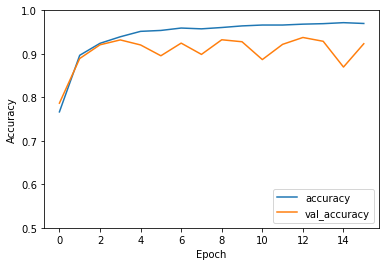

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

### Testing Model

In [31]:
#TYPES OF PREDICTIONS

def predict_label_count(ls):
    max_value_count = [0 for _ in range(len(ls[0]))]
    for song_piece_predction_ls in ls:
        max_value = np.argmax(song_piece_predction_ls)
        max_value_count[max_value] += 1
    return max_value_count

def predict_sum_of_prediction(ls):
    return np.sum(ls, axis=0)

prediction_functions_ls = [predict_label_count,predict_sum_of_prediction]

def initListAsDict(ls):
    output_dict = {}
    for item in ls:
        output_dict.update({
            item.__name__ : {
                "function_data":{
                    "function_obj": item
                },
                "function_performance":{
                    "total_song_count": 0,
                    "correctly_classified":0,
                    "wrongly_classified":0
                }
            },
        })
    return output_dict

In [32]:
def initSongPredictionData(genre,songname):
    global_data["data0"][genre]["data1"][songname].update({
        "prediction_data":{}
    })

def updateSongPredictionData(genre,songname,function_name,function_output,predicted_label):
    global_data["data0"][genre]["data1"][songname]["prediction_data"].update(
        {function_name : {
            "predicted_label":predicted_label,
            "output": function_output   
        }}
    )

In [33]:
def updateFunctionPerformance(function_name,is_correct_prediction):
    prediction_functions[function_name]["function_performance"]["total_song_count"] += 1
    if is_correct_prediction:
        prediction_functions[function_name]["function_performance"]["correctly_classified"] += 1
    else:
        prediction_functions[function_name]["function_performance"]["wrongly_classified"] += 1

In [34]:
prediction_functions = initListAsDict(prediction_functions_ls)

for genre,value in global_data["data0"].items():
    for songname in value["metadata1"]["to_test_song_ls"]:
        print("Looking at", songname)
        initSongPredictionData(genre,songname)
        
        
        expected_label = getGenreIntAssignment(genre)
        track_data = getTrackData(genre,songname)
        result = model.predict(np.array(track_data["cut_data"]["cut_spectrum"]))
        for function_name, data in prediction_functions.items():
            print(f"{function_name}")
            function = data["function_data"]["function_obj"]
            
            function_output = function(result)
            predicted_label = np.argmax(function_output)
            is_correct_prediction = expected_label == predicted_label
            
            
            if genre.lower() != "test":
                print(f"Expected:{expected_label}. Received:{predicted_label}")
                updateFunctionPerformance(function_name,is_correct_prediction)
            else:
                print(f"Test Prediction:{predicted_label}")
            print(function_output)
            
            updateSongPredictionData(genre,songname,function_name,function_output,predicted_label)
            
            print()
        print("-------------------------------------------------------------")

Looking at 【東方ボーカル】 幽閉サテライト - Party Trick.mp3
predict_label_count
Expected:0. Received:0
[80, 0, 2]

predict_sum_of_prediction
Expected:0. Received:0
[78.464386    0.95557606  2.580034  ]

-------------------------------------------------------------
Looking at DESIRE OVER DOSE (feat. 越田Rute隆人 & あき, ｙｔｒ, 抹) _ 魂音泉 [Music Video].mp3
predict_label_count
Expected:0. Received:0
[63, 0, 26]

predict_sum_of_prediction
Expected:0. Received:0
[63.455917   1.6999818 23.8441   ]

-------------------------------------------------------------
Looking at 【東方Vocal／Trance】翼などなくとも「幽閉サテライト」.mp3
predict_label_count
Expected:0. Received:0
[82, 1, 9]

predict_sum_of_prediction
Expected:0. Received:0
[83.26796    1.7298766  7.0021644]

-------------------------------------------------------------
Looking at 【公式】【東方Vocal】幽閉サテライト _ 零れずの願いゴト 【FullMV】(原曲：砕月).mp3
predict_label_count
Expected:0. Received:0
[83, 5, 4]

predict_sum_of_prediction
Expected:0. Received:0
[81.56931    5.6716666  4.759037 ]

-----------

predict_label_count
Expected:2. Received:2
[28, 17, 55]

predict_sum_of_prediction
Expected:2. Received:2
[28.432377 17.112158 54.455463]

-------------------------------------------------------------
Looking at 09 Flashbat (Hardstyle Remix).m4a
predict_label_count
Expected:2. Received:2
[4, 4, 105]

predict_sum_of_prediction
Expected:2. Received:2
[  4.0291557   3.846385  105.12444  ]

-------------------------------------------------------------
Looking at 12. Red Your Scarlet -separate-.mp3
predict_label_count
Expected:2. Received:2
[9, 6, 68]

predict_sum_of_prediction
Expected:2. Received:2
[ 9.207798   7.0703173 66.72188  ]

-------------------------------------------------------------
Looking at 【東方Hardcore】Jerking Zipper【明日ハレの日、ケの昨日】.mp3
predict_label_count
Expected:2. Received:2
[0, 2, 87]

predict_sum_of_prediction
Expected:2. Received:2
[ 1.7383478  2.588757  84.67289  ]

-------------------------------------------------------------
Looking at 08. This Is Bird Flowing -separ

predict_label_count
Test Prediction:2
[18, 2, 47]

predict_sum_of_prediction
Test Prediction:2
[17.845848   1.8426044 47.31155  ]

-------------------------------------------------------------
Looking at 10 - 天音 - Cherry Smokers.mp3
predict_label_count
Test Prediction:2
[3, 0, 104]

predict_sum_of_prediction
Test Prediction:2
[  3.241869     0.72256684 103.03556   ]

-------------------------------------------------------------
Looking at BLACKPINK - Whistle.m4a
predict_label_count
Test Prediction:0
[57, 0, 14]

predict_sum_of_prediction
Test Prediction:0
[58.229992   1.3555137 11.414486 ]

-------------------------------------------------------------
Looking at ClariS - Hitorigoto (Eromanga Sensei OP 1).m4a
predict_label_count
Test Prediction:2
[20, 9, 46]

predict_sum_of_prediction
Test Prediction:2
[20.661076  8.762852 45.57608 ]

-------------------------------------------------------------
Looking at Guilt Crown OST - Krone.m4a
predict_label_count
Test Prediction:1
[17, 34, 3]

pr

predict_label_count
Test Prediction:1
[1, 30, 2]

predict_sum_of_prediction
Test Prediction:1
[ 1.494299   30.615223    0.89047915]

-------------------------------------------------------------
Looking at Hataraku Saibou - Sensei Anone (Platelets Theme Song).m4a
predict_label_count
Test Prediction:2
[20, 23, 35]

predict_sum_of_prediction
Test Prediction:1
[24.505331 26.944164 26.5505  ]

-------------------------------------------------------------
Looking at 04. White White Glass.mp3
predict_label_count
Test Prediction:1
[13, 37, 25]

predict_sum_of_prediction
Test Prediction:1
[13.96254  37.563026 23.474434]

-------------------------------------------------------------
Looking at Girls Generation (SNSD) - Gee.m4a
predict_label_count
Test Prediction:0
[49, 1, 15]

predict_sum_of_prediction
Test Prediction:0
[50.181137   1.6774794 13.141379 ]

-------------------------------------------------------------
Looking at Jerry C. - Canon Rock.m4a
predict_label_count
Test Prediction:1
[6, 

predict_label_count
Test Prediction:1
[4, 42, 27]

predict_sum_of_prediction
Test Prediction:1
[ 5.219487 41.179165 26.601353]

-------------------------------------------------------------
Looking at 12. T, 1948,12 Yama of Xanadu,.mp3
predict_label_count
Test Prediction:1
[2, 84, 3]

predict_sum_of_prediction
Test Prediction:1
[ 1.6961861 84.59975    2.7040637]

-------------------------------------------------------------
Looking at 【東方Future House】 Island Girl 「Rolling Contact」.mp3
predict_label_count
Test Prediction:2
[7, 1, 85]

predict_sum_of_prediction
Test Prediction:2
[ 8.22087    2.1151085 82.66401  ]

-------------------------------------------------------------
Looking at Camila Cabello - Havana (ft. Young Thug).m4a
predict_label_count
Test Prediction:2
[3, 4, 62]

predict_sum_of_prediction
Test Prediction:2
[ 3.1425967  4.3399477 61.517456 ]

-------------------------------------------------------------
Looking at 06 - MORRIGAN - Millenary Dream.mp3
predict_label_count
Tes

Test Prediction:2
[1, 0, 101]

predict_sum_of_prediction
Test Prediction:2
[ 1.3043026  0.7377846 99.95791  ]

-------------------------------------------------------------
Looking at Honey Works (CV. Mya) - 可愛くなりたい (I Want To Be Cute).m4a
predict_label_count
Test Prediction:2
[23, 12, 46]

predict_sum_of_prediction
Test Prediction:2
[23.150316 12.191564 45.65812 ]

-------------------------------------------------------------
Looking at 07. Innocent Wind.mp3
predict_label_count
Test Prediction:1
[3, 86, 6]

predict_sum_of_prediction
Test Prediction:1
[ 3.662538 87.0036    4.333843]

-------------------------------------------------------------
Looking at Halo OST - Original Halo Theme.m4a
predict_label_count
Test Prediction:1
[0, 56, 2]

predict_sum_of_prediction
Test Prediction:1
[ 1.1567614 55.633976   1.2092669]

-------------------------------------------------------------
Looking at Jónsi - Where No One Goes.m4a
predict_label_count
Test Prediction:0
[26, 13, 13]

predict_sum_of_p

In [35]:
pretty(prediction_functions)

predict_label_count
	function_data
		function_obj
			<function predict_label_count at 0x00000293DB9B9940>
	function_performance
		total_song_count
			42
		correctly_classified
			42
		wrongly_classified
			0
predict_sum_of_prediction
	function_data
		function_obj
			<function predict_sum_of_prediction at 0x00000293DB9B99D0>
	function_performance
		total_song_count
			42
		correctly_classified
			41
		wrongly_classified
			1


In [36]:
pretty(global_data)

metadata0
	num_songs
		347
	num_genres
		3
	cut_len
		138109
	use_optimal_cut
		True
	use_test_genre
		True
	optimal_loss_type
		portion_overlap_loss
data0
	Vocal
		metadata1
			genre_int_assignment
				0
			num_songs_for_this_genre
				68
			to_train_song_ls
				['【東方ボーカル】 幽閉サテライト - 胸の中で誰かが.mp3', '【東方ボーカル】 幽閉サテライト - 宵の華.mp3', '【東方 Touhou Vocal】魂音泉 - Border Of Life ft. ytr, Romonosov -p,雨天決行,司芭扶.mp3', '【東方vocal】この場から feat . ｙｔｒ、抹、らっぷびと「TAMAONSEN - 魂音泉」.mp3', '【東方Vocal／Trance Rock】御伽噺のカラクリは、 (Marcia Cover Version)「幽閉サテライト」.mp3', '【東方ボーカル】ZYTOKINE - I, SCREAM feat. cold kiss.mp3', '【東方ボーカル】「孤独のphilosophy」【幽閉サテライト】.mp3', '【公式】【東方Vocal】幽閉サテライト _ 森羅万象に触れて～驚～【FullMV】(原曲：亡き王女の為のセプテット _ フラワリングナイト _ 少女秘封俱楽部).mp3', '【東方ボーカル】 「零れ桜」 【幽閉サテライト】.mp3', '【公式】【東方Vocal】幽閉サテライト _ 明鏡止水【FullMV】(原曲：幽雅に咲かせ、墨染の桜 ～ Border of Life _ ゴーストリード).mp3', '【東方vocal】- envY (2021 Remix) - CYTOKINE.mp3', '【公式】【東方Vocal】幽閉サテライト _ 善悪の頂にある真実【FullMV】(原曲：原曲：天衣無縫 _ 有頂天変 ～ Wonderful Heaven).mp3', 'TOHO Geek -東方永夜抄EX編- _ 魂音泉 [Music